In [13]:
import tensorflow as tf
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Let's start by loading the MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [14]:
mnist = keras.datasets.mnist
(X_train, _), (X_test, _) = mnist.load_data()

Each pixel intensity is represented as a byte (0 to 255); we scale it to 0-1 range and convert data to floats:

In [15]:
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

Let's take a look at a sample of the images in the dataset:

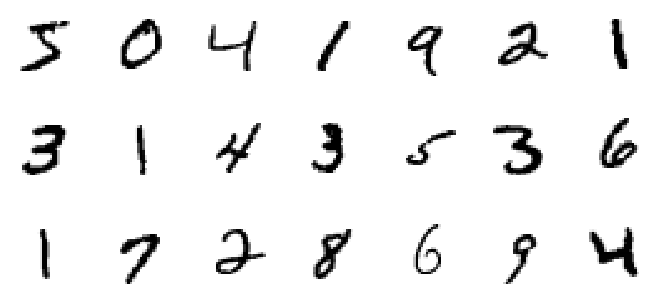

In [16]:
n_rows = 3
n_cols = 7
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Simple Autoencoder

We subclass the `Model` class of Keras to define the new model. Actually, we could also use a traditional `Sequential` model to assemble encoder and decoder.

In [23]:
class Autoencoder(keras.models.Model):
  def __init__(self, latent_dim, input_shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = input_shape
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(tf.math.reduce_prod(input_shape).numpy(), activation='sigmoid'),
      tf.keras.layers.Reshape(input_shape) # reshapes flattened representation to original shape (e.g., 2D image)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [26]:
original_shape = X_test.shape[1:]
latent_img=(5,5)
latent_dim = latent_img[0]*latent_img[1]
autoencoder = Autoencoder(latent_dim, original_shape)

autoencoder.compile(optimizer='adam', loss="mse")


autoencoder.fit(X_train, X_train, # Note!
                epochs=20,
                shuffle=True,
                validation_data=(X_test, X_test),
               callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])


Epoch 1/20
(32, 25)
(32, 25)
(32, 25)
1848/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.0564(None, 25)
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - loss: 0.0560 - val_loss: 0.0194
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - loss: 0.0183 - val_loss: 0.0150
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - loss: 0.0151 - val_loss: 0.0139
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - loss: 0.0143 - val_loss: 0.0136
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - loss: 0.0140 - val_loss: 0.0134
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 580us/step - loss: 0.0139 - val_loss: 0.0134
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - loss: 0.0138 - val_loss: 0.0133
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - loss: 0.0138 - val_loss: 0.0133
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - loss: 0.0137 - val_loss: 0.0132
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - loss: 0.0137 - val_loss: 0.0132
Ep

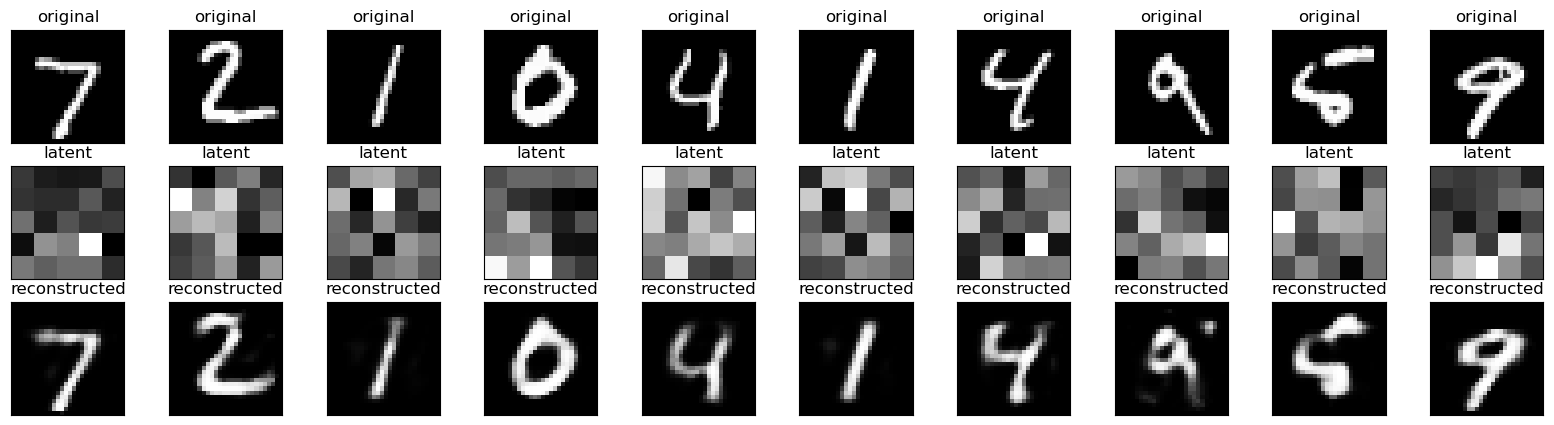

In [27]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()


n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(X_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(latent_img))
  plt.title("latent")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


# Fashion MNIST

In [35]:
mnist = keras.datasets.fashion_mnist
(X_train, _), (X_test, _) = mnist.load_data()

Each pixel intensity is represented as a byte (0 to 255); we scale it to 0-1 range and convert data to floats:

In [36]:
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

Let's take a look at a sample of the images in the dataset:

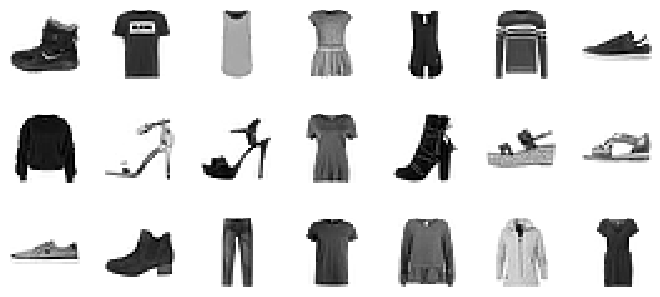

In [37]:
n_rows = 3
n_cols = 7
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [38]:
shape = X_test.shape[1:]
latent_img=(10,10)
latent_dim = latent_img[0]*latent_img[1]
autoencoder = Autoencoder(latent_dim, shape)

autoencoder.compile(optimizer='adam', loss="bce")


autoencoder.fit(X_train, X_train, # Note!
                epochs=20,
                shuffle=True,
                validation_data=(X_test, X_test),
               callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

autoencoder.summary()

Epoch 1/20
(32, 100)
(32, 100)
(32, 100)
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3472(None, 100)
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3471 - val_loss: 0.2806
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2757 - val_loss: 0.2730
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2698 - val_loss: 0.2702
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2674 - val_loss: 0.2689
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2662 - val_loss: 0.2682
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2655 - val_loss: 0.2676
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2651 - val_loss: 0.2673
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2648 - val_loss: 0.2671
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2646 - val_loss: 0.2670
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2644 - val_loss: 0.2669
Epoch 11/20
1875/187

Model: "autoencoder_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)      │ (32, 100)              │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_19 (Sequential)      │ (32, 28, 28)           │        79,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 473,054 (1.80 MB)

 Trainable params: 157,684 (615.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 315,370 (1.20 MB)

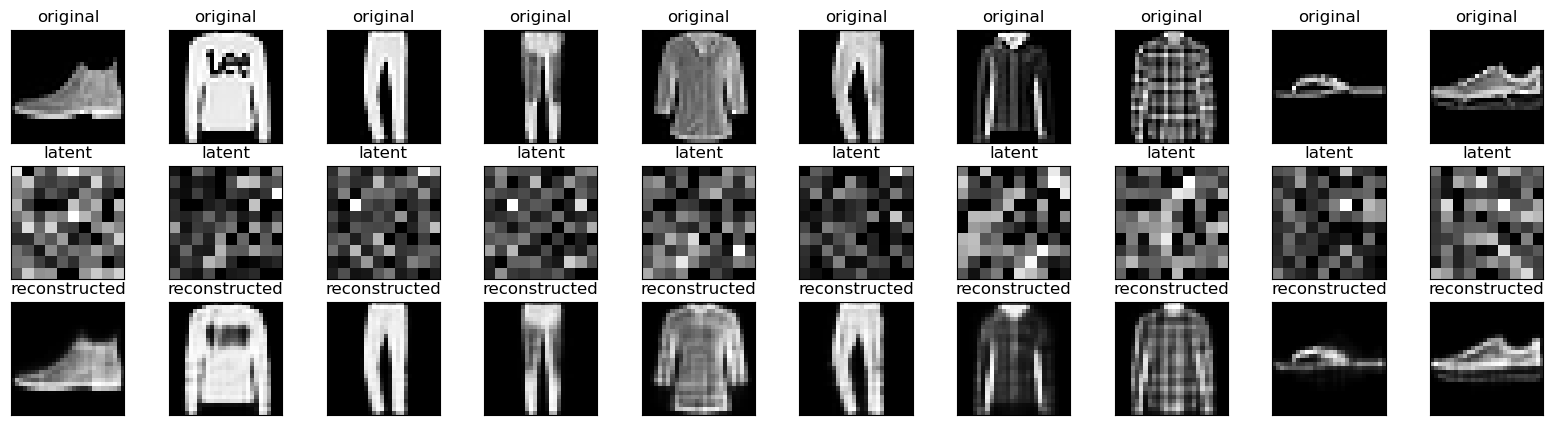

In [39]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()


n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(X_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(latent_img))
  plt.title("latent")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


# Convolutional Autoencoder

In [43]:
class ConvAutoencoder(keras.models.Model):
  def __init__(self):
    super(ConvAutoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      keras.layers.Input(shape=(28, 28, 1)),
      keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      keras.layers.Conv2DTranspose(5, kernel_size=3, strides=2, activation='relu', padding='same'),
      keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = ConvAutoencoder()
autoencoder.compile(optimizer='adam', loss="bce")
autoencoder.fit(X_train, X_train, # Note!
                epochs=20,
                shuffle=True,
                validation_data=(X_test, X_test),
               callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

autoencoder.summary()

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3394 - val_loss: 0.2686
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2643 - val_loss: 0.2613
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2581 - val_loss: 0.2591
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2565 - val_loss: 0.2583
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.2559 - val_loss: 0.2579
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2555 - val_loss: 0.2576
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2553 - val_loss: 0.2574
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2551 - val_loss: 0.2573
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2549 - val_loss: 0.2571
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2548 - val_loss: 0.2570
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2547 - val_loss: 0.2569
Epoch 12/20
1875/1875 ━━━━━━

Model: "conv_autoencoder_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_22 (Sequential)      │ (None, 7, 7, 5)        │           885 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_23 (Sequential)      │ (32, 28, 28, 1)        │         1,111 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,990 (23.40 KB)

 Trainable params: 1,996 (7.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,994 (15.61 KB)

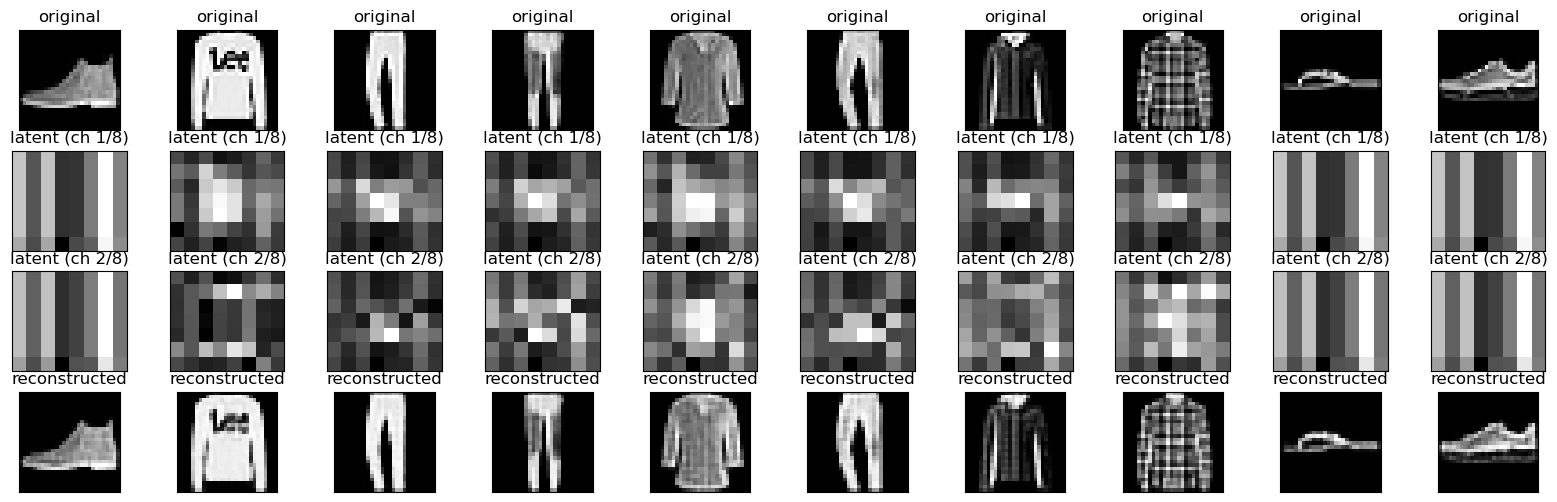

In [42]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
  # display original
  ax = plt.subplot(4, n, i + 1)
  plt.imshow(X_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(4, n, i + 1 + n)
  plt.imshow(encoded_imgs[i][0])
  plt.title("latent (ch 1/8)")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(4, n, i + 1 + 2*n)
  plt.imshow(encoded_imgs[i][-1])
  plt.title("latent (ch 2/8)")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(4, n, i + 1 + 3*n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
